# CCT College Dublin

## Assessment Cover Page

To be provided separately as a word doc for students to include with every submission

Module Title: Artificial Intelligence 

Assessment Title: AI_Lv8_CA2_v8 

Lecturer Name:  David McQuaid

Student Full Name: Eric Kim Mabe

Student Number: 2020366

Assessment Due Date: 

Date of Submission: 19/11/2023

## Declaration 

By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.


#### Exploring Pathfinding Algorithms: A Comparative Analysis of Dijkstra's Algorithm and A* Search


Introduction

Pathfinding algorithms are used in various fields to optimize routes, minimize costs, and determine efficient paths in different scenarios. Two popular algorithms for solving pathfinding problems are Dijkstra’s Algorithm and A* Search. This essay aims to compare these algorithms, highlighting their characteristics, applications, and specific processes for finding the shortest path. Understanding these algorithms and their practical applications is crucial for improving problem-solving skills in real-world scenarios.

#### Differences between a graph and a tree

Graphs and trees are two types of structures used in computer science. A graph can contain cycles, which means it can have closed loops, allowing for multiple paths between nodes. In contrast, trees are acyclic, meaning they do not have cycles or loops. Trees have a hierarchical structure with a single root node and branches that lead to child nodes. On the other hand, a graph can have multiple root nodes and nodes with multiple parents.

In terms of connections, any two nodes in a graph can be connected to each other, with no restrictions on how nodes are linked. In a tree, each node (except the root) has a single parent, and the connections flow from parent to child.

With regard to paths, a graph allows for multiple paths between nodes, accommodating alternative routes and loops. In a tree, there is always a unique path between any two nodes, leading from the root to the destination.

Graphs are used to model relationships and connections in diverse real-world scenarios, such as transportation networks and social networks, where multiple routes and cycles are common. Trees, on the other hand, are commonly used in hierarchical structures like file systems and organizational charts 1.

Difference between graph and tree (2023) GeeksforGeeks. Available at: 
https://www.geeksforgeeks.org/difference-between-graph-and-tree/ (Accessed: 03 November 2023). 

Sari, W. by: S. (2021) Tree vs graph data structure, Baeldung on Computer Science. Available at: https://www.baeldung.com/cs/tree-vs-graph-data-structure (Accessed: 03 November 2023). 

#### How the graph is an abstraction of the problem

The schematic diagram here looks like a simple map that we can use to better understand the problem. It uses small circles (we call them buttons) and lines (these are edges) to show important parts. Each node has a letter and represents specific positions or stages of the problem. Edges with numbers on them indicate how these places or steps connect to each other. For example, starting from node A is like the starting point of our journey and node S is where we want to end. The edges tell us what you can do, such as go from A to B or B to C. The numbers on the edges, like A-B=1, tell us how far it is or how much it costs to travel. How much does it take to make these movements? This helps us determine the best way to get from start to solution, which is important in many real-life situations. The diagram also shows that there are many different paths we can take from the starting point to the solution. This means we have options and can choose different ways to solve problems. In a nutshell, this visual representation makes it easier for us to study and understand the problem, find the best routes, compare costs, and make decisions using this simplified model.

#### "Why Graphical Visualizations are Great Clear as Day:

Graphs make things very clear.
They give us a simple picture of what is connected to what, helps problem solvers understand everything.
Explore paths: Think of it like a treasure map.
Graphics let us explore different ways to get from start to  finish end by showing you all the routes you can borrow.
Easy to use wallet: Think of it as a price comparison tool.
The graph tells us how much it costs to get from one place to another, so you can choose the most economical route.
Perfect for solving real-world problems.
Smart decision making: It's like having a road map.
Charts help decision makers choose the fastest or cheapest way to achieve their goals.
Problem solved step by step: If you have a large and complex problem.
The graphic breaks it down into smaller parts so you can focus on each part one by one and solve it more easily.
Teamwork and chat: When you need to work with others, diagrams become your common language.
 It's like a whiteboard where people can draw and talk about plans.
 Ideal for thinking together.
 Dijkstra's magic: Have you ever used  GPS to find the shortest route?
 Dijkstra's algorithm is like the wizard behind it.
 He was famous for finding the fastest route on the map.
 So, in a graph where points are connected by distance, finding the shortest path from the starting point (A) to the destination (S) will help to find the shortest path.


##### Step 1:
Initialization Start at the initial node A and set its distance to 0 (distance from A to A is 0) and the distance to all other nodes to infinity.
 Create a priority queue (or min heap) to keep track of  unvisited nodes.
 


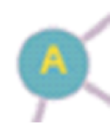

##### Step 2:
First iteration In the first step of  Dijkstra's algorithm, we start by updating the distances to A's neighboring nodes, which are B, C and H.
 Distance from A to B is set to 1, representing a straight line connecting from A to B.
 Similarly, the distance from A to C is set to 5, representing a path from A to C.
 Finally, the distance from A to H is assign value 2, which represents a  direct connection between A and H.
 The  updated distance below represents the minimum distance required to reach node B in the graph.


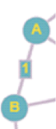

##### Step 3:
Second iteration In the second step of the algorithm, the current node becomes B.
 In this step, the distance to its neighboring nodes, namely A, C and D, is updated .
 The new distance from B to A is defined as 1, because it is the weighted sum  of the edge from A to B (1) and the previously calculated shortest distance from A to B (0).
 Similarly, the new distance from B to C turns out to be 3 and from B to D is 5.
 The distance below represents the shortest path from  source node A to node C via node B.

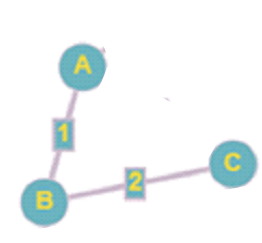

Characterize the problem by formulating it as a graph, utilizing a dictionary structure where nodes serve as keys, and their associated neighbors, along with their respective edge weights, are encapsulated within sub-dictionaries.

In [26]:
import heapq
import time
import matplotlib.pyplot as plt

In [27]:
graph = {
    'A': {'B': 1, 'C': 5, 'H': 2},
    'B': {'A': 1, 'C': 2, 'D': 4},
    'C': {'A': 5, 'B': 2, 'G': 1},
    'D': {'B': 4, 'E': 4, 'F': 7, 'L': 7},
    'E': {'B': 4, 'F': 3, 'W': 6},
    'F': {'D': 7, 'E': 3, 'G': 2},
    'G': {'C': 1, 'F': 2, 'L': 3},
    'H': {'A': 2, 'J': 9, 'K': 5},
    'J': {'H': 9, 'K': 3, 'N': 6},
    'K': {'H': 5, 'J': 3, 'L': 5},
    'L': {'D': 7, 'G': 3, 'K': 5, 'M': 4, 'N': 3, 'V': 10, 'W': 8},
    'M': {'L': 4, 'P': 2, 'Q': 10},
    'N': {'J': 6, 'K': 5, 'L': 3, 'P': 4, 'S': 7},
    'P': {'M': 2, 'N': 4, 'R': 5},
    'Q': {'M': 10, 'S': 8, 'W': 4},
    'R': {'P': 5, 'S': 4, 'T': 3},
    'S': {'N': 7, 'P': 4, 'Q': 8, 'R': 4, 'T': 4, 'U' : 2, 'V': 6},
    'T': {'R': 3, 'S': 4, 'U': 1},
    'U': {'S': 2, 'T': 1, 'V': 3},
    'V': {'L': 10, 'S': 6, 'U': 3, 'W': 5},
    'W': {'E': 6, 'L': 8, 'Q': 4, 'V': 5}
}

We’re using Dijkstra’s Algorithm to find the shortest path between nodes in a graph. This algorithm calculates the shortest distance from the starting node to all other nodes in the graph.

In [28]:
# Dijkstra's algorithm for finding the shortest path in a weighted graph
def dijkstra(graph, start, end):
    shortest_distance = {}  # Dictionary to store the shortest distance from the start node to each node
    predecessor = {}        # Dictionary to store the predecessor node for each node in the shortest path
    unseen_nodes = list(graph)  # List of all nodes in the graph that have not been processed yet
    infinity = float('inf')    # Represents infinity as a placeholder for initially unknown distances
    path = []  # List to store the nodes in the shortest path from start to end

    # Initialize shortest_distance with infinity for all nodes except the start node
    for node in unseen_nodes:
        shortest_distance[node] = infinity
    shortest_distance[start] = 0

    # Main loop to find the shortest path
    while unseen_nodes:
        min_node = None
        # Find the node with the smallest distance among the unseen nodes
        for node in unseen_nodes:
            if min_node is None:
                min_node = node
            elif shortest_distance[node] < shortest_distance[min_node]:
                min_node = node

        # Update distances for neighboring nodes through the current minimum node
        for child, weight in graph[min_node].items():
            if weight + shortest_distance[min_node] < shortest_distance[child]:
                shortest_distance[child] = weight + shortest_distance[min_node]
                predecessor[child] = min_node

        # Remove the processed node from the unseen_nodes list
        unseen_nodes.remove(min_node)

    current_node = end
    # Reconstruct the shortest path from end to start
    while current_node != start:
        try:
            path.insert(0, current_node)
            current_node = predecessor[current_node]
        except KeyError:
            print("Path not reachable")
            break
    path.insert(0, start)
    
    # Print the results if a path from start to end exists
    if shortest_distance[end] != infinity:
        print("Dijkstra's Algorithm")
        print("Shortest path:", ' -> '.join(path))
        print("Shortest distance:", shortest_distance[end])


We are going to use the A* Search Algorithm to find the shortest path in a graph. This algorithm is like a map that helps us find the best way to get from one place to another. It’s really smart and can help us find the best path quickly.

In [29]:
# A* algorithm for finding the shortest path in a weighted graph
def astar(graph, start, end):
    open_list = [(0, start)]
    came_from = {}  
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph}
    f_score[start] = heuristic(start, end)

    while open_list:
        current = min(open_list, key=lambda x: f_score[x[1]])

        if current[1] == end:
            return reconstruct_path(came_from, end)

        open_list.remove(current)
        for neighbor, cost in graph[current[1]].items():
            tentative_g_score = g_score[current[1]] + cost
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current[1]
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, end)
                if neighbor not in [x[1] for x in open_list]:
                    open_list.append((f_score[neighbor], neighbor))

    return None

In the A* Search algorithm, a heuristic function is used to estimate the cost of the cheapest path from the current node to the goal. This function is essential to the algorithm because it allows it to prioritize paths that are more likely to lead to a solution.

In [30]:
# Calculate the heuristic (estimated cost) from a node to a goal node
def heuristic(node, goal):
    # Retrieve the coordinates of the current node and the goal node from a predefined data structure (node_coords)
    node_x, node_y = node_coords[node]
    goal_x, goal_y = node_coords[goal]

    # Calculate the Euclidean distance as the heuristic value, which is the square root of the sum of squared differences
    heuristic_value = ((node_x - goal_x) ** 2 + (node_y - goal_y) ** 2) ** 0.5

    return heuristic_value

The reconstruct_path function is used in the A* Search Algorithm to trace back from the goal node to the start node and find the shortest path. It is an essential part of the algorithm.

In [31]:
# Reconstruct the path from the 'came_from' dictionary for a given 'current_node'
def reconstruct_path(came_from, current_node):
    path = [current_node]  # Initialize a list to store the reconstructed path, starting with the current node

    # Follow the 'came_from' dictionary to backtrack and build the path
    while current_node in came_from:
        current_node = came_from[current_node]  # Move to the parent node of the current node
        path.insert(0, current_node)  # Insert the parent node at the beginning of the path list

    return path  # Return the reconstructed path from the start node to the end node


In the code snippet provided, we specify the positions of the nodes on the graph. These positions are then utilized in the heuristic function to estimate the Euclidean distance.

In [32]:
# Dictionary that stores coordinates for various nodes in a graph
node_coords = {
    'A': (0, 0),
    'B': (1, 1),
    'C': (1, 0),
    'D': (2, 1),
    'E': (3, 0),
    'F': (3, 1),
    'G': (2, 0),
    'H': (0, 2),
    'J': (1, 3),
    'K': (2, 3),
    'L': (2, 2),
    'M': (3, 2),
    'N': (3, 3),
    'P': (4, 2),
    'Q': (4, 3),
    'R': (4, 4),
    'S': (5, 3),
    'T': (5, 4),
    'U': (6, 3),
    'V': (6, 2),
    'W': (4, 0),
}

This code block initializes the A* Search Algorithm to find the shortest path in the ‘graph’ from node ‘A’ to node ‘S’. It first checks if a valid path exists from ‘A’ to ‘S’. If a valid path is found, it proceeds to print the following information: the output as the result of the A* Search Algorithm, followed by the actual shortest path and the actual distance of the shortest path. It iterates through each node in the ‘path’ and adds up the corresponding edge weights to determine the total distance.

In [33]:
path = astar(graph, 'A', 'S')
if path:
    print("A* SEARCH ALGORITHM")
    print("Shortest path:", ' -> '.join(path))
    distance = sum(graph[path[i]][path[i+1]] for i in range(len(path) - 1))
    print("Shortest distance:", distance)
else:
    print("Error!Path is out of reach.")

A* SEARCH ALGORITHM
Shortest path: A -> B -> C -> G -> L -> N -> S
Shortest distance: 17


We define the function measure_execution_time here. It takes an algorithm and a graph as inputs and returns how long the algorithm takes to run on the graph. This is a crucial metric to compare how well Dijkstra’s Algorithm and A* Search Algorithm perform.

In [34]:
def measure_execution_time(graph, start, end, algorithm):
    start_time = time.time()
    result = algorithm(graph, start, end)
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time